In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c = pd.read_csv('classification.csv')
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


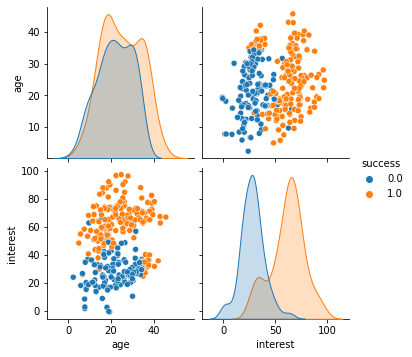

In [2]:
sns.pairplot(hue='success',data=c)

In [3]:
from sklearn.model_selection import train_test_split

x = c[['age','interest']]
y = c['success']

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, train_size=0.7,random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


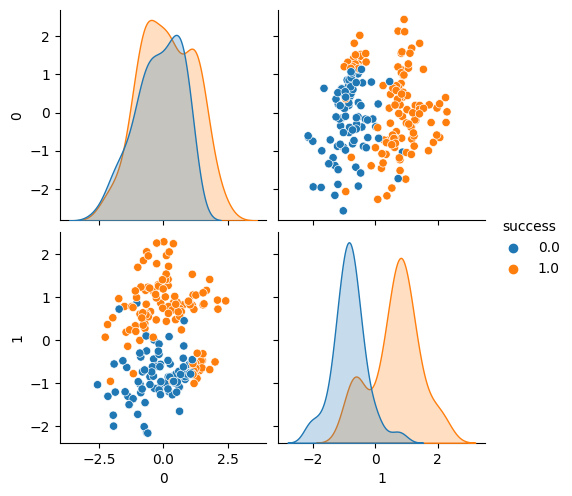

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

sns.pairplot(data = pd.concat([pd.DataFrame(x_train),
                               y_train.reset_index(drop=True)],
                              axis=1), hue = 'success')

In [5]:
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(x_train,y_train)

SVC(C=0.5)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

x_scaled_test = scaler.transform(x_test)
pred = clf.predict(x_scaled_test)

test_cm = confusion_matrix(y_test,pred)
test_acc = accuracy_score(y_test,pred)
test_prc = precision_score(y_test,pred)
test_rc = recall_score(y_test,pred)
test_f1 = f1_score(y_test,pred)

print(test_cm,'\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rc*100,2)))
print('f1\t{}'.format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]] 

정확도	95.56%
정밀도	96.08%
재현율	96.08%
f1	96.08


C:\Users\suhye\AppData\Local\Temp\ipykernel_15800\1168774335.py:23: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(xx,yy,Z,
C:\Users\suhye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\suhye\AppData\Local\Temp\ipykernel_15800\1168774335.py:23: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(xx,yy,Z,


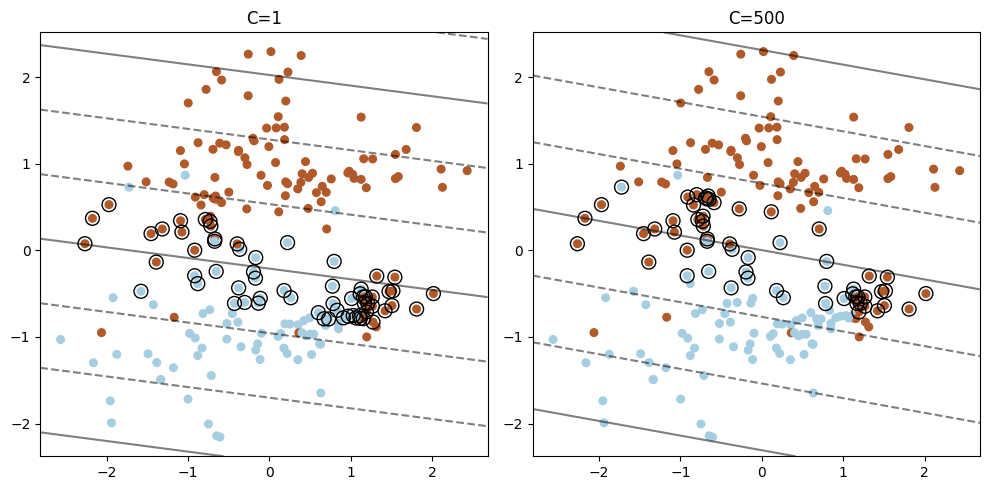

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10,5))
for i, C in enumerate([1,500]):
    clf = LinearSVC(C=C,loss='hinge',random_state=42).fit(x_train,y_train)
    
    #decision function으로 서포트 벡터 얻기
    decision_function = clf.decision_function(x_train)
    support_vectio_indices = np.where(np.abs(decision_function) <= 1+1e-15)[0]
    support_vectors = x_train[support_vectio_indices]
    
    plt.subplot(1,2,i+1)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0],xlim[1],50), 
                         np.linspace(ylim[0],ylim[1],50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,
                colors='k',
                labels=[-1,0,1],
                alpha=0.5,
                linestyles=['--','-','--'])
    plt.scatter(support_vectors[:,0],
                support_vectors[:,1],
                s=100,linewidth=1,
                facecolors='none',
                edgecolors='k')
    plt.title('C='+str(C))
plt.tight_layout()
plt.show()   